In [1]:
import pandas as pd
import numpy as np

In [92]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import gseapy as gp
import os
from gseapy.plot import barplot, dotplot

In [3]:
isim = "coad/COAD"

In [4]:
isim_tsv = isim + ".tsv"
isim_df = pd.read_table(isim).T.reset_index()

isim_clinical = pd.read_table(isim_tsv)
isim_clinical = isim_clinical.set_index("submitter_id")

isim_df.columns = isim_df.iloc[0]

isim_df.drop(isim_df.index[0],inplace=True)

isim_df["sample_type"] = isim_df["sample"].apply(lambda row: row[-2:])

isim_df["submitter_id"] = isim_df["sample"].apply(lambda row: row[:-3])

joined = isim_df.join(isim_clinical, on = "submitter_id")

stages = {"Stage 1":["stage i", "stage ia","stage ib","stage ic"],
     "Stage 2":["stage ii", "stage iia","stage iib","stage iic"],
     "Stage 3":["stage iii", "stage iiia","stage iiib","stage iiic"],
     "Stage 4":["stage iv", "stage iva","stage ivb","stage ivc"],
     "Stage 5":["stage v", "stage va","stage vb","stage vc"],
     "Stage Not Reported":["not reported", "--", ""]}

def get_stages(stage):
    for stage_key in stages:
        if stage in stages[stage_key]:
            return stage_key



joined["tumor_stage_categories"] = joined["tumor_stage"].apply(lambda row: get_stages(row))

list_col = joined.columns.tolist()

new_list = list_col[-30:]+list_col[:-30]

vital = new_list[14]
sample = new_list[30]
s_type = new_list[0]
t_cat = new_list[29]
t_sta = new_list[12]

changeables = sample, vital, s_type, t_cat, t_sta

bos1 = []
for i in new_list:
    if i in changeables:
        pass
    else:
        bos1.append(i)

bos1.insert(0, sample)
bos1.insert(8, vital)
bos1.insert(8, s_type)
bos1.insert(8, t_cat)
bos1.insert(8, t_sta)

joined2 = joined[bos1]

In [33]:
joined2.to_csv("new_coad.csv", sep="\t", index=False)

In [3]:
coad_analysis = pd.read_csv("COAD_analysis_ready.txt", sep="\t")

/home/pispanyol/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (17,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
coad_analysis._get_numeric_data().iloc[:,3:]

ARHGEF10L   HIF3A   RNF17    RNF10    RNF11    RNF13  GTF2IP1    REM1  \
0      10.1616  3.7172  0.0000  10.4857  10.5157  11.1805  11.3755  2.7680   
1      11.1212  2.3437  0.0000  11.6878  10.3830   9.9166  11.9240  2.4817   
2      11.0245  2.0858  0.5495  11.5062   9.9334   9.6560  11.6354  3.7064   
3      11.0576  6.0759  0.0000  11.7053  10.2443  10.2250  11.3220  2.8994   
4      10.5660  1.9506  0.0000  11.8684   9.8537   9.9356  11.4306  2.6602   
5      10.4189  5.4777  0.0000  11.4861  10.1777   9.2937  12.0257  5.6451   
6      10.8635  4.4634  0.0000  11.4397   9.3104   9.6805  11.1841  3.0654   
7      10.3716  1.8943  0.0000  11.7580  10.4115  10.3127  12.1518  4.5908   
8      11.5113  4.7474  0.0000  11.4303  10.6953  10.3167  12.1010  2.3611   
9      11.1823  4.0668  0.0000  11.8429  10.0012  10.2312  12.3130  5.5281   
10     10.3753  3.8031  0.0000  12.1726  10.1776  10.1009  12.5646  3.3476   
11     10.9454  5.5781  0.0000  11.9317  10.1428   9.6621  11.4031  3.2356   
12     10.5801  2.7722  0.0000  11.8621  10.0331   9.9800  11.6815  4.3532   
13     11.3511  5.9152  0.0000  11.5976  10.0935  10.1198  12.2796  3.6106   
14      9.9895  1.5317  0.0000  11.5517  10.0831  10.2737  11.3665  3.4501   
15     10.6339  4.0363  0.0000  12.0669   9.4022   9.6604  11.6717  3.3032   
16     10.4558  3.2882  0.0000  11.4887   9.6595  10.7569  12.0661  2.6687   
17     10.4599  3.6171  0.0000  11.3388   9.4254  10.3744  11.1656  3.9762   
18     12.1639  3.8096  0.0000  11.6743   9.8101  10.0181  11.2324  2.1992   
19     11.2254  6.0671  0.0000  11.7117   8.9965   9.7103  12.1918  2.2936   
20      9.7535  4.6549  0.0000  11.5842  10.3593  10.5332  11.2425  3.6234   
21     10.8220  3.9389  0.0000  11.6362   9.9826  10.7126  11.4884  3.6812   
22     10.9332  5.2065  0.0000  11.5706  10.0931   9.9666  12.4983  3.8179   
23      8.9255  1.5096  0.0000  10.5356   9.9690  11.0510  10.7463  2.9585   
24     10.4411  3.6180  0.0000  11.6310   9.7841  10.2678  11.3621  4.3561   
25     11.1746  9.9680  0.0000  11.6404  10.4134  10.3300  11.9572  6.0148   
26     10.9821  5.5060  0.0000  11.4163   9.7259  10.1796  11.2981  4.7948   
27     10.1170  3.2079  0.0000  11.5742  10.5789  10.4476  12.6004  4.7175   
28     11.5292  5.1827  0.0000  11.4124  10.3120   9.9533  12.1488  1.9078   
29      9.8254  5.0261  0.0000  11.1220   9.8495  10.7407  11.6273  2.0202   
..         ...     ...     ...      ...      ...      ...      ...     ...   
254    10.6996  3.3179  0.0000  11.6469   9.6743  10.1171  11.2427  3.0467   
255    10.6117  2.8164  0.0000  10.9689  10.7626  10.3478  11.3178  2.5717   
256    11.2478  7.6655  0.0000  11.9708  10.3465   9.7062  11.6049  4.6129   
257    11.3727  2.4628  0.0000  11.6992   9.6576   9.4832  11.3591  2.6033   
258    10.6451  5.1297  1.0766  11.4783  10.2930   9.9479  11.4215  3.8388   
259    11.1611  4.4968  0.0000  11.5756  10.1297  10.2681  12.0854  4.4619   
260    11.0890  1.2675  0.0000  12.2489   9.4710   9.5091  12.2963  0.7687   
261    11.3932  2.2108  0.0000  11.2522  10.2424   9.6396  12.5110  1.1439   
262    10.7133  1.6204  0.0000  11.7389   9.9147   9.5997  11.8398  2.5028   
263    10.7529  2.7039  0.0000  11.7792  10.0846   9.8639  12.2032  4.1676   
264    11.7469  5.0047  0.5121  11.9382   9.9305  10.1390  12.2088  4.4792   
265    11.3136  4.4041  0.0000  11.6509   9.8213   9.9728  11.8997  4.4929   
266    10.5135  6.3040  0.5730  11.7234  10.2839  10.7609  11.4321  3.2893   
267    11.1752  4.3351  0.0000  12.1531   9.2025  10.3249  11.1417  1.1535   
268    10.8968  5.7694  0.0000  11.4160   9.7034   9.7093  11.8130  2.3558   
269    11.0212  8.7194  0.0000  11.3359  10.1947  10.0219  11.4145  2.3209   
270    11.2027  5.7814  0.0000  11.6117  10.1315   9.6984  12.3207  4.2750   
271    11.0215  3.6846  0.0000  12.0472  10.7540  10.3625  11.5970  2.3082   
272    11.7823  2.3254  0.0000  11.6305  10.0095  10.3512  12.2112  3.9737   
273    11.0382  7.0168  0.0

In [8]:
#coad_gener_filt = coad_analysis[(coad_analysis["gender"]=="female") | (coad_analysis["gender"]=="male")]

# PCA

/home/pispanyol/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pispanyol/.local/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


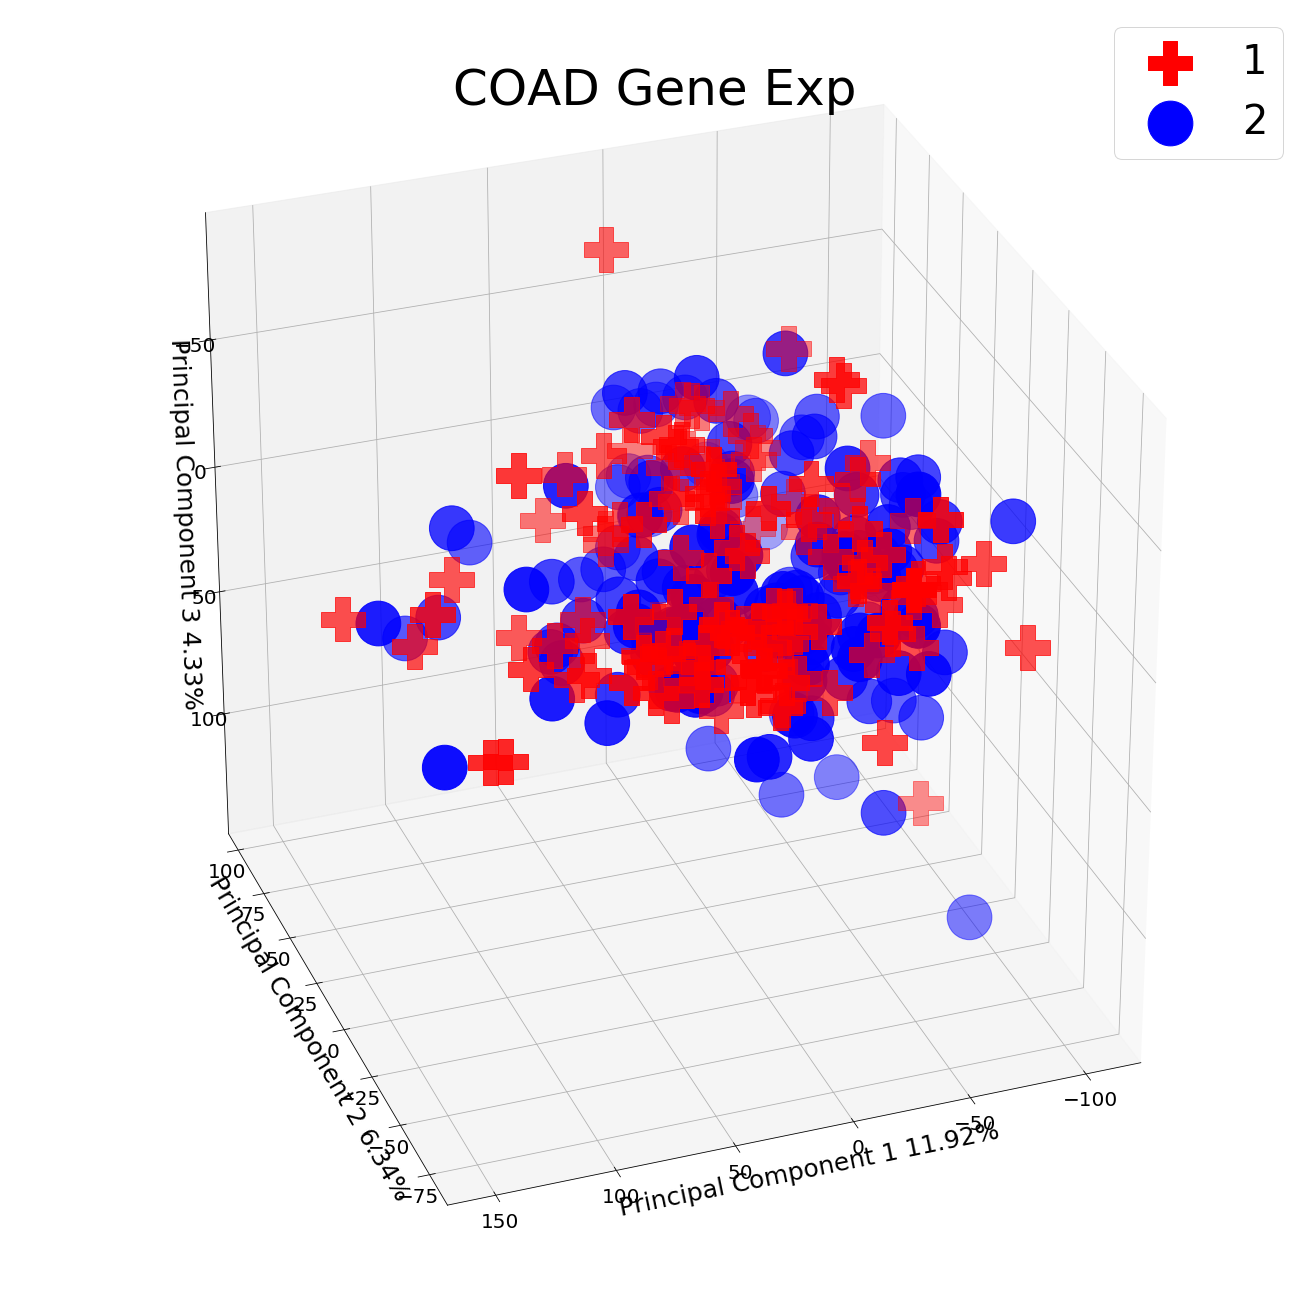

In [38]:
#%matplotlib notebook
#%matplotlib auto
%matplotlib inline
genes_numeric = coad_analysis._get_numeric_data().iloc[:,3:]

dict_w = dict(zip(coad_analysis.gender.unique(), ["p", "P"]))

first_d = StandardScaler().fit_transform(genes_numeric)

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(first_d)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2', "pca3"])


finalDf = pd.concat([principalDf, coad_analysis[["sample_type",'gender', "Cluster"]]], axis = 1)
fig = plt.figure(figsize = (18,18))
#fig = plt.figure(figsize = (8,18))
ax = Axes3D(fig, elev=-150, azim=110)
ax.set_xlabel('Principal Component 1 ' + "{0:.2f}%".format(list(pca.explained_variance_ratio_)[0]*100), fontsize = 25)
ax.set_ylabel('Principal Component 2 ' + "{0:.2f}%".format(list(pca.explained_variance_ratio_)[1]*100),  fontsize = 25)
ax.set_zlabel('Principal Component 3 ' + "{0:.2f}%".format(list(pca.explained_variance_ratio_)[2]*100), fontsize = 25)
ax.set_title('{name} Gene Exp'.format(name="COAD"), fontsize = 50)


"""for target_t, color in zip(list(coad_analysis.sample_type.unique()), "rbgy"):
    indicesToKeep = finalDf['sample_type'] == target_t
    ax.scatter(finalDf.loc[indicesToKeep, 'pca1']
               , finalDf.loc[indicesToKeep, 'pca2']
               , finalDf.loc[indicesToKeep, 'pca3']
              , c = color
              , s=[1300])
"""
"""for target_t, color, marker in zip(coad_analysis.gender.unique(), "rbgy", "Po"):
    w_list = []
    indicesToKeep = finalDf['gender'] == target_t
    for i in finalDf[indicesToKeep].gender:
        w_list.append(dict_w[i])
    ax.scatter(finalDf.loc[indicesToKeep, 'pca1']
               , finalDf.loc[indicesToKeep, 'pca2']
               , finalDf.loc[indicesToKeep, 'pca3']
              , c = color 
              , marker = marker
              , s= [2000])

"""
"""for target_t, color in zip(coad_analysis.Cluster.unique(), "rbgy"):
    indicesToKeep = finalDf['Cluster'] == target_t
    ax.plot3D(finalDf.loc[indicesToKeep, 'pca1']
               , finalDf.loc[indicesToKeep, 'pca2']
               , finalDf.loc[indicesToKeep, 'pca3']
             , c = color )

"""
ax.legend(coad_analysis.sample_type.unique(),prop={'size': 40})
plt.tick_params(labelsize=20)
ax.grid()


In [40]:
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

def lighten_color(color, amount=0.5):
    #https://stackoverflow.com/questions/37765197/darken-or-lighten-a-color-in-matplotlib
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [95]:
new_set = variance_threshold_selector(coad_analysis._get_numeric_data().iloc[:,3:], threshold=8)

In [101]:
coad_analysis.tumor_stage_categories.unique()

array(['Stage 2', 'Stage 1', 'Stage 3', 'Stage Not Reported', 'Stage 4'],
      dtype=object)

In [103]:
lut = dict(zip(coad_analysis.Cluster.unique(), "rbg"))
lut2 = dict(zip(coad_analysis.gender.unique(), "rbg"))
lut3 = dict(zip(coad_analysis.tumor_stage_categories.unique(), "rbgyc"))

clust = list()
gend = list()
stage = list()
for i in coad_analysis[["Cluster","gender", "tumor_stage_categories"]].values:
    gend.append(i[1])
    clust.append(i[0])
    stage.append(i[2])
row_colors = pd.Series(gend, name="gender").map(lut2)
row_colors2 = pd.Series(clust, name="Cluster").map(lut)
row_colors3 = pd.Series(stage, name="Stage").map(lut3)

In [106]:
row_colors3

0      r
1      b
2      r
3      g
4      g
5      g
6      y
7      b
8      c
9      r
10     r
11     g
12     r
13     g
14     b
15     r
16     g
17     r
18     r
19     g
20     c
21     c
22     g
23     r
24     r
25     g
26     r
27     r
28     r
29     r
      ..
254    g
255    r
256    r
257    r
258    g
259    r
260    y
261    g
262    r
263    c
264    g
265    y
266    r
267    g
268    r
269    b
270    g
271    g
272    g
273    r
274    b
275    r
276    g
277    r
278    r
279    g
280    r
281    g
282    r
283    r
Name: Stage, Length: 284, dtype: object

In [74]:
std_f4 = pd.DataFrame(StandardScaler().fit_transform(new_set),
            columns=new_set.columns)

Text(0.5, 0.98, '')

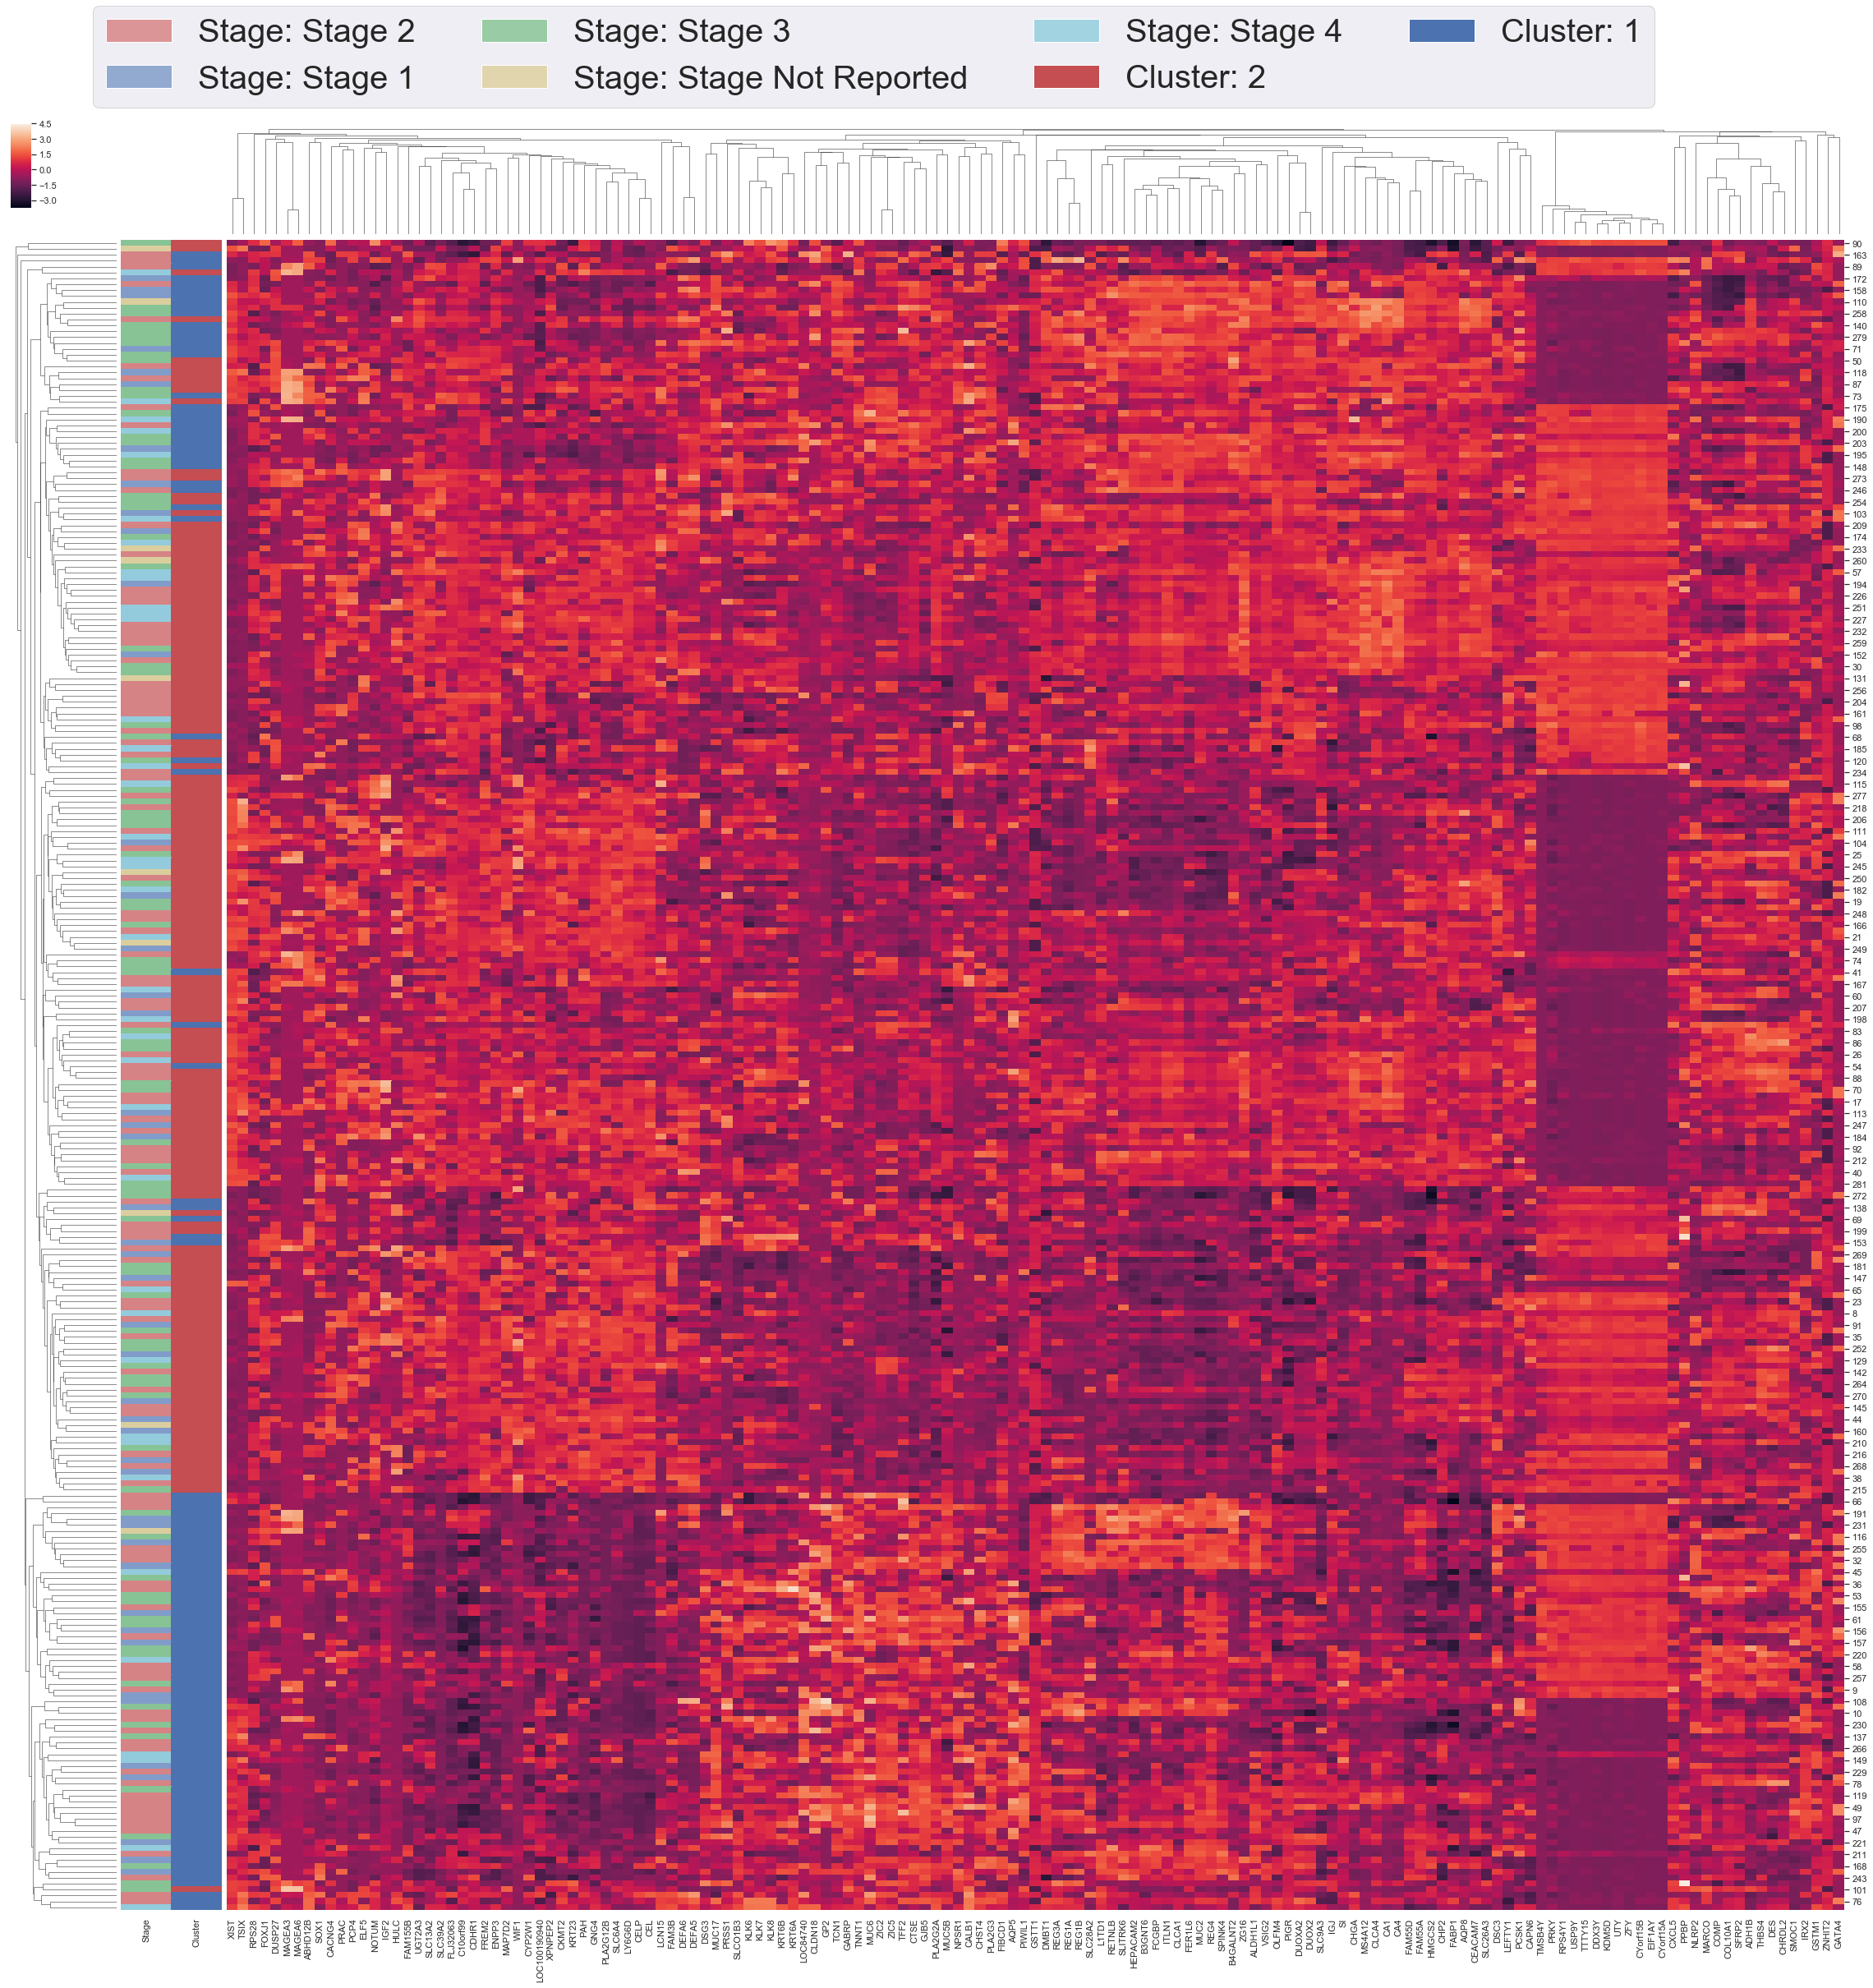

In [107]:
sns.set(context="notebook")
g = sns.clustermap(std_f4,
                row_colors=pd.concat([row_colors3.map(lambda x: lighten_color(x, 0.7)),row_colors2], axis=1),
                   figsize=(40,40))


for target_w, color in zip(coad_analysis.tumor_stage_categories.unique(), row_colors3.unique()):
    # Make long label
    
    g.ax_col_dendrogram.bar(1, 2, color=lighten_color(color, 0.6), label="Stage: {}".format(target_w))
    
for target_t, color in zip(coad_analysis.Cluster.unique(), "rbgy"):
    # Make long label
    g.ax_col_dendrogram.bar(1, 2, color=color, label="Cluster: {}".format(target_t))
    
g.ax_col_dendrogram.legend(loc="lower center", ncol=4, bbox_to_anchor=(0.4,1), prop={'size': 40})

g.fig.suptitle('', fontsize=50)

2019-11-29 13:27:08,222 Connecting to Enrichr Server to get latest library names
2019-11-29 13:27:08,229 Analysis name: new_barplot, Enrichr Library: KEGG_2019_Human
2019-11-29 13:27:09,985 Save file of enrichment results: Job Id:57c6d0a2b59cc532390ccb07b4290278
2019-11-29 13:27:10,557 Done.



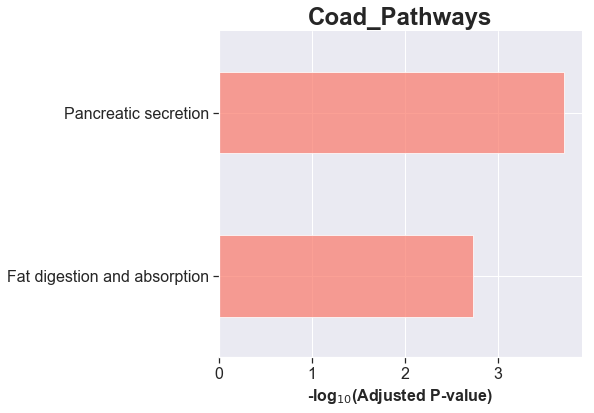

In [94]:
enr2 = gp.enrichr(gene_list=list(new_set.columns),
                 # or gene_list=glist
                 description="new_barplot",
                 gene_sets="KEGG_2019_Human",
                  # you have to specify the background genes, if local mode used
                 background='hsapiens_gene_ensembl', # or the number of genes, e.g 20000
                 outdir=os.getcwd(),
                 cutoff=0.1, # only used for plotting.
                 verbose=True)
barplot(enr2.res2d,title="Coad_Pathways",)